### Logistic Regression

- Logistic Regression is a Machine Learning classification algorithm that is used to predict
  the probability of a categorical dependent variable(Y).
  
  
-  the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

### Logistic Regression based on linear model

<img src="images/log.jpg" width="60%" />

#### but in Logistic regression 

<img src="images/log2.PNG" width="30%"/>

### Modeling with Linear Probability Model(LPM)

- linear probability model is a special case of a binomial regression ( a technique in which the response denoted "success" or 1, and "failure" or 0)model.


- Here the dependent variable for each observation takes values which are either 0 or 1.


- In LPM ,we find  the probability of  0 or 1 for each observation which contains one or more explanatory variables.


<img src="images/p1.png"/>

### Two conditions must be satisfied while calculating probability :-

#### 1: must be positive always (p>0)

 <img src="images/exp.PNG" width="30%"/>

#### 2: must be less than one or equal to 1

<img src="images/exp3.PNG" width='30%'/>

### The logistic function is:

<img src="images/logistic_function.png" width="30%"/>

In [ ]:
from sklearn.datasets import load_diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('dataset/data.csv',header=None)

In [4]:
data.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness' ,
              'Insulin' ,'BMI' ,'DiabetesPedigreeFunction' ,'Age','Outcome']

In [14]:
data.head(2)
data.shape

(768, 9)

In [6]:
X = np.array(data[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
#X = StandardScaler().fit_transform(X)
y = np.array(data['Outcome'])

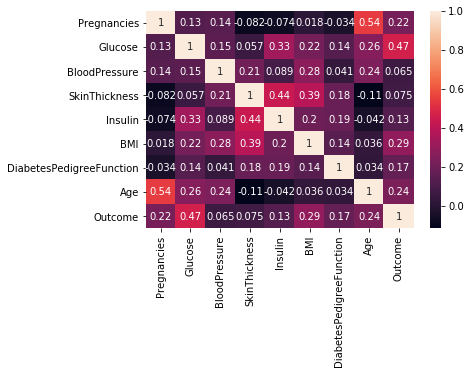

In [10]:
#sns.pairplot(data)
sns.heatmap(data.corr(),annot=True)

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
#X_train,X_test = X[:500],X[500:]
#y_train,y_test = y[:500],y[500:]

In [16]:
scd = StandardScaler()
X_std=scd.fit_transform(X_train)

In [17]:
log1=LogisticRegression()
log1.fit(X_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
log1.score(scd.transform(X_test),y_test)

0.734375

In [20]:
X_test.shape

(192L, 4L)

In [21]:
np.bincount(y_test)

array([125,  67], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
#(y_true,y_pred)
confusion_matrix(y_test,log1.predict(scd.transform(X_test)))

array([[105,  20],
       [ 31,  36]], dtype=int64)

In [ ]:
t=X_test[0]

In [ ]:
t

In [ ]:
pred = log1.predict(t.reshape(1,-1))

In [ ]:
pred

In [ ]:
y_test[0]

In [ ]:
print log1.intercept_
print log1.coef_

In [ ]:
def line(Glucose, BMI, DPF, Age):
    r=log1.intercept_[0]+log1.coef_[0][0]*Glucose+log1.coef_[0][1]*BMI+log1.coef_[0][2]*DPF+log1.coef_[0][3]*Age
    
    return r


In [ ]:
def prob(Glucose, BMI, DPF, Age):
    value = line(Glucose, BMI, DPF, Age)
    
    return 1/(1+np.exp(-value))
    

In [ ]:
prob(Glucose=tn[0][0],BMI=tn[0][1], DPF=tn[0][2], Age=tn[0][3])

In [ ]:
log1.predict_proba(scd.transform(t.reshape(1,-1)))

In [ ]:
tn=scd.transform(t.reshape(1,-1))

In [ ]:
log1.predict(tn)

In [ ]:
tn[0][0]